# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
joint_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")
# Display the data table for preview
joint_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
joint_data["Mouse ID"].value_counts()

g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
unique_mice = joint_data.loc[joint_data["Timepoint"]==0, :]
unique_mice.value_counts(["Mouse ID"])

Mouse ID
g989        2
a203        1
s121        1
q597        1
q610        1
           ..
j246        1
j296        1
j365        1
j755        1
z969        1
Length: 249, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse = joint_data.loc[joint_data["Mouse ID"] == "g989", :]
dupe_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = joint_data.loc[joint_data["Mouse ID"] != "g989", :]
clean_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_mice.value_counts(["Mouse ID"]))

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
sum_stats = pd.DataFrame()
drug_groups = clean_mice["Tumor Volume (mm3)"].groupby(clean_mice["Drug Regimen"])
sum_stats["Mean Tumor Volume"] = drug_groups.mean()
sum_stats["Median Tumor Volume"] = drug_groups.median()
sum_stats["Tumor Volume Variance"] = drug_groups.var()
sum_stats["Tumor Volume Std. Dev."] = drug_groups.std()
sum_stats["Tumor Volume Std. Err."] = drug_groups.sem()
sum_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_stats = drug_groups.aggregate(["mean", "median", "var", "std", "sem"])
agg_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

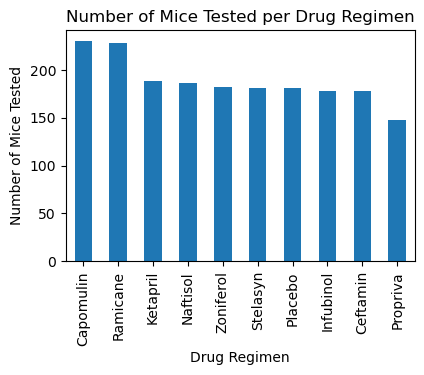

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouse_counts = clean_mice["Drug Regimen"].value_counts()
mouse_counts.plot(kind="bar",figsize=(4.5,3),xlabel="Drug Regimen",
                  ylabel="Number of Mice Tested",
                  title="Number of Mice Tested per Drug Regimen")
plt.show()

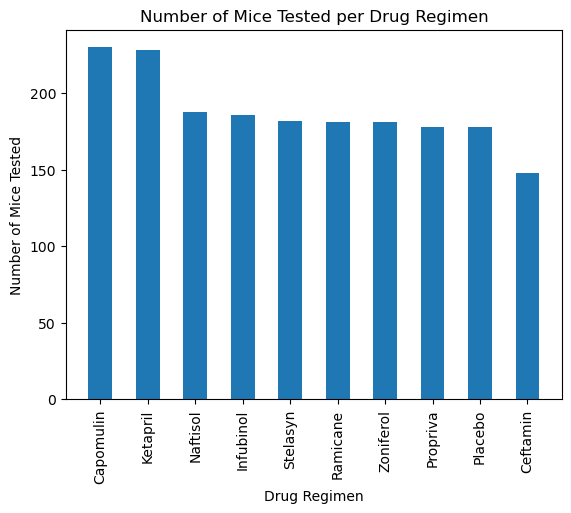

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x = clean_mice["Drug Regimen"].unique()
y = clean_mice["Drug Regimen"].value_counts()
plt.bar(x, y, align="center", width=0.5)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested per Drug Regimen")
plt.show()

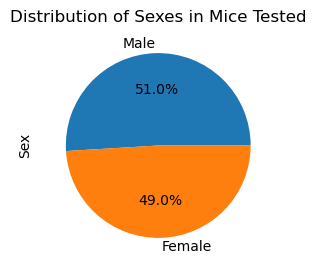

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_mouse = clean_mice["Sex"].value_counts()
sex_mouse.plot(kind="pie", autopct='%1.1f%%', figsize=(4,3), title="Distribution of Sexes in Mice Tested")
plt.show()

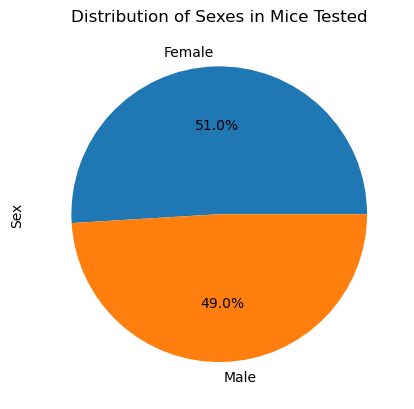

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x = clean_mice["Sex"].value_counts()
plt.pie(x, labels=clean_mice["Sex"].unique(), autopct='%1.1f%%')
plt.ylabel("Sex")
plt.title("Distribution of Sexes in Mice Tested")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Found idxmax() function with help from https://www.tutorialspoint.com/python-pandas-find-the-maximum-value-of-a-column-and-return-its-corresponding-row-values#:~:text=To%20find%20the%20maximum%20value,idxmax()%5D.
highest_tumor = pd.DataFrame()
unique_mouse = clean_mice["Mouse ID"].unique()
for mouse in unique_mouse:
    series_mouse = clean_mice.loc[clean_mice["Mouse ID"] == mouse, :]
    highest_tumor = highest_tumor.append(series_mouse.loc[series_mouse["Timepoint"].idxmax()])

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_mice = pd.merge(clean_mice, highest_tumor[["Mouse ID", "Tumor Volume (mm3)"]], on="Mouse ID", how="outer")
merged_mice = merged_mice.rename(columns={"Tumor Volume (mm3)_x": "Tumor Volume (mm3)", "Tumor Volume (mm3)_y": "Final Tumor Volume"})
#merged_mice.head()
highest_tumor.head()

# Please note, this section doesn't always run correctly if ran repeatedly for some reason unknown to me
# if this occurs please restart kernel and run all cells and that should fix it

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45.0,38.982878,2.0,Capomulin,Female,9.0,22.0
10,f932,0.0,45.000000,0.0,Ketapril,Male,15.0,29.0
18,g107,35.0,71.905117,0.0,Ketapril,Female,2.0,29.0
21,a457,10.0,49.783419,0.0,Ketapril,Female,11.0,30.0
30,c819,40.0,62.175705,1.0,Ketapril,Male,21.0,25.0


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = clean_mice["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = [highest_tumor.loc[highest_tumor["Drug Regimen"]==drug, ["Tumor Volume (mm3)"]] for drug in treatments]

print(tumor_vol_data[0])
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
iqr = highest_tumor["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])


    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

      Tumor Volume (mm3)
9              38.982878
1680           38.753265
1690           32.377357
1700           23.343598
1710           38.939633
1720           28.484033
1730           41.483008
1740           40.728578
1744           46.539206
1754           31.023923
1764           38.125164
1774           40.658124
1784           36.041047
1794           37.311846
1804           41.581521
1814           31.896238
1824           40.159220
1834           37.074024
1844           38.846876
1847           39.952347
1857           34.455298
1867           47.685963
1877           33.329098
1882           30.485985
1892           28.430964


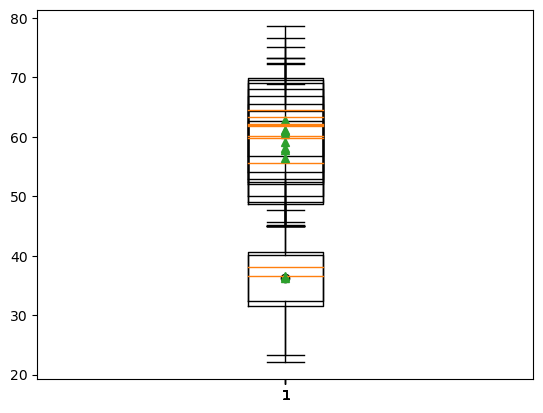

In [29]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
for drug in tumor_vol_data:
    plt.boxplot(drug, showmeans=True)
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen



In [19]:
#do the written analysis nerd